### dataset is the array of 4 dimensions (60000,28,28,1)(samples, x, y, color channels)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# since data is already in tensorflow we just import it
from tensorflow.keras.datasets import mnist

In [3]:
# since the data is already splitted into X_train, y_train, X_test, y_test we just use tuple unpacking
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape # shape of x_train

(60000, 28, 28)

In [5]:
single_image = x_train[0] # getting single image shape

In [6]:
single_image.shape # single image shape 

(28, 28)

In [7]:
single_image # all the raw value from single image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

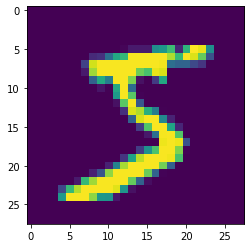

In [8]:
# if we have 2d images matplotlib as imshow which can display the 2d array object
plt.imshow(single_image)

In [9]:
# exploring the labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
### Now converting the level data into one-hot encoding since it is categorical data
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
# changing into one-hot encoding 
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
# now if we look at the index 0 we can see that now 1 is at 5 index which indicating it belong to class 5
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# now we convert both test labels and the train labels into categorical labels
y_cat_test = to_categorical(y_test, num_classes=10) # num_classes mean the number of class which is 10 it will be automatically 
# assigned but sometimes there might me expections so that we can also assign it manually

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

#### to make sure i dont run into any gradient problems these are scaled between 0 and 1 we can do by using minmaxscaler but we need to divide by 255 bcoz in future the useen images always have value between 0 and 255, just by the way they're constructed with red, green, blue channels

In [20]:
x_train = x_train/255 # scaling x_train

In [21]:
x_test = x_test/255 # scaling x_test

In [22]:
scaled_image = x_train[0]

In [23]:
scaled_image.max()

1.0

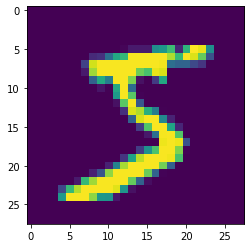

In [24]:
plt.imshow(scaled_image) # since ratio and everything is same the img should be same as before

In [25]:
# the next step is to reshape our data just to let we are now dealing with single rgb channel since our color of img is blck and
# white
x_train.shape

(60000, 28, 28)

In [26]:
#batch_size (total sampling), height, width, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

### creating the model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten # fallten is used to flatten the img into our final dense
#layer which will actuall perfrom classification

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # flattening img

model.add(Dense(128,activation='relu')) # adding one more dense layer

# output layer software --> multi class classsification
model.add(Dense(10,activation='softmax'))

#keras.io/metrics

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [32]:
y_cat_train.shape

(60000, 10)

In [33]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1402 - accuracy: 0.9585 - val_loss: 0.0547 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0548 - val_accuracy: 0.9819


In [34]:
 metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140246,0.958467,0.054721,0.9824
1,0.049815,0.984450,0.054830,0.9819


<AxesSubplot:>

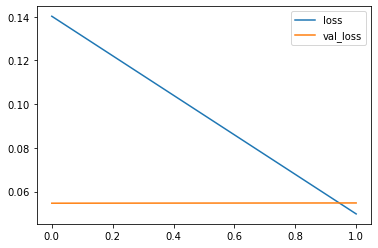

In [36]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

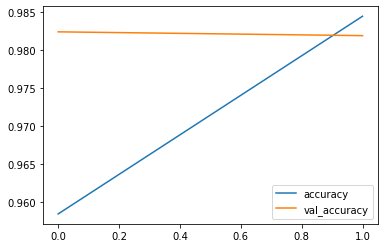

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
# to get the actual actual metrics of any data 
model.metrics_names

['loss', 'accuracy']

In [39]:
model.evaluate(x_test,y_cat_test,verbose=0) # it make sense bcoz if we see the last validation test it same with that 

[0.054829735308885574, 0.9818999767303467]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
x_test.shape

(10000, 28, 28, 1)

In [59]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [60]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [61]:
y_cat_test.shape

(10000, 10)

In [62]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      1.00      0.97      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [65]:
confusion_matrix(y_test, predictions)

array([[ 975,    0,    0,    1,    0,    1,    2,    0,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,    6, 1008,    5,    3,    0,    3,    4,    0,    0],
       [   0,    0,    3, 1005,    0,    0,    1,    1,    0,    0],
       [   0,    1,    0,    0,  974,    0,    1,    0,    0,    6],
       [   1,    0,    0,   23,    0,  865,    2,    0,    1,    0],
       [   5,    2,    0,    1,    2,    3,  945,    0,    0,    0],
       [   1,    1,    6,    4,    0,    1,    0, 1014,    1,    0],
       [   7,    2,    6,    6,    0,    3,   11,    5,  931,    3],
       [   4,    4,    1,   10,    6,    3,    0,   11,    3,  967]],
      dtype=int64)

In [66]:
### predicting single img
my_number = x_test[0]

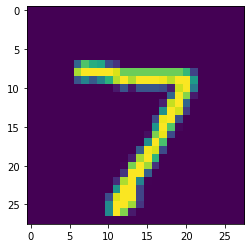

In [67]:
plt.imshow(my_number.reshape(28,28))

In [68]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)